In [88]:
import scanpy as sc
import anndata
import numpy as np
import os 
import seaborn as sns
import matplotlib.pyplot as plt

In [89]:
def plot_qc_metrics(adata):

    fig, axs = plt.subplots(1, 3, figsize=(20, 4))

    axs[0].set_title("Total transcripts per cell")
    sns.histplot(adata.obs["total_counts"], kde=False, ax=axs[0])
    
    axs[1].set_title("Unique transcripts per cell")
    sns.histplot(adata.obs["n_genes_by_counts"].unique(), kde=False, ax=axs[1])

    
    axs[2].set_title("Number of genes per cell")
    sns.histplot(adata.obs["n_genes_by_counts"], kde=False, ax=axs[2])

    plt.tight_layout()
    plt.show()

In [90]:
output_dir = "./Output"
file_path = "./data/haltere.tsv"
os.makedirs(output_dir, exist_ok=True)

Number of cells: 11641
Number of genes: 2726
<bound method AnnData.obs_names_make_unique of AnnData object with n_obs × n_vars = 11641 × 2726
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'>


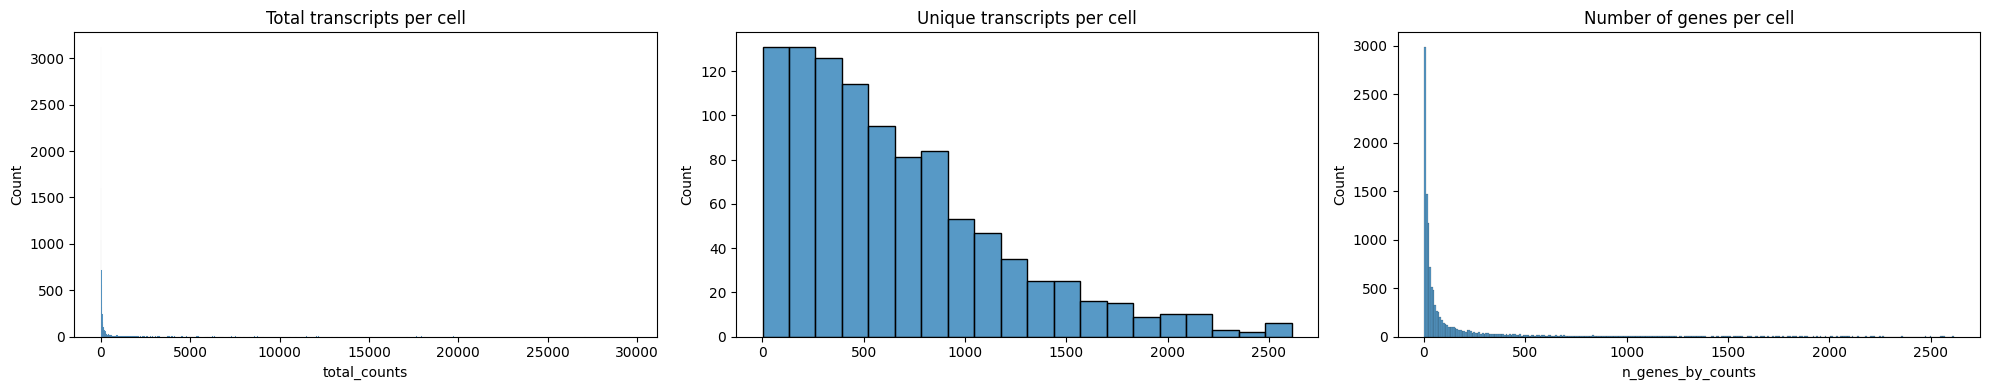

Number of cells after filtering: 11641
Number of genes after filtering: 2726


In [91]:
data=sc.read(file_path)

print(f"Number of cells: {data.n_obs}")
print(f"Number of genes: {data.n_vars}")

sc.pp.calculate_qc_metrics(data, inplace=True)
print(data.obs_names_make_unique)
plot_qc_metrics(data)


#sc.pp.filter_cells(data, min_genes=200)  #filter out cells with fewer than 10 genes
#sc.pp.filter_genes(data, min_cells=20)  #filter out genes expressed in fewer than 10 cells
 
#print the number of cells and genes after filtering
print(f"Number of cells after filtering: {data.n_obs}")
print(f"Number of genes after filtering: {data.n_vars}")

sc.pp.normalize_total(data, target_sum=1e6) #normalize in cpm
sc.pp.log1p(data) #log normalize

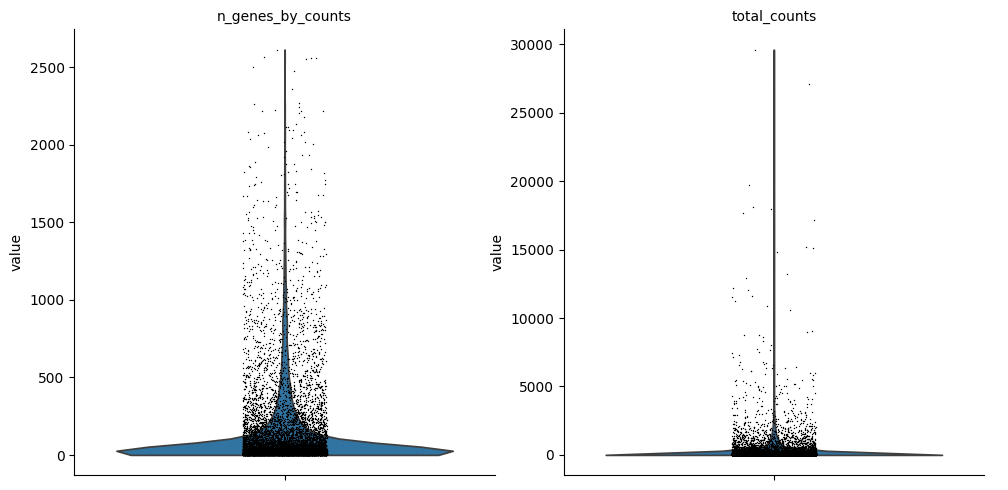

In [92]:
sc.pl.violin(data, ['n_genes_by_counts','total_counts'],
             multi_panel=True)

In [93]:
data.obs

,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes
128up,24,3.218876,25.0,3.258096,100.000000,100.000000,100.000000,100.000000
14-3-3epsilon,831,6.723832,1217.0,7.104965,16.351684,26.705012,43.138866,72.801972
14-3-3zeta,1336,7.198184,2444.0,7.801800,13.747954,22.545008,35.965630,62.888707
140up,22,3.135494,23.0,3.178054,100.000000,100.000000,100.000000,100.000000
18SrRNA-Psi:CR41602,151,5.023881,156.0,5.056246,35.256410,67.307692,100.000000,100.000000
...,...,...,...,...,...,...,...,...
zip,599,6.396930,841.0,6.735780,21.165279,33.055886,52.556480,88.228300
zld,14,2.708050,32.0,3.496508,100.000000,100.000000,100.000000,100.000000
zormin,810,6.698268,1935.0,7.568379,19.741602,33.126615,52.506460,83.979328
zuc,2,1.098612,2.0,1.098612,100.000000,100.000000,100.000000,100.000000


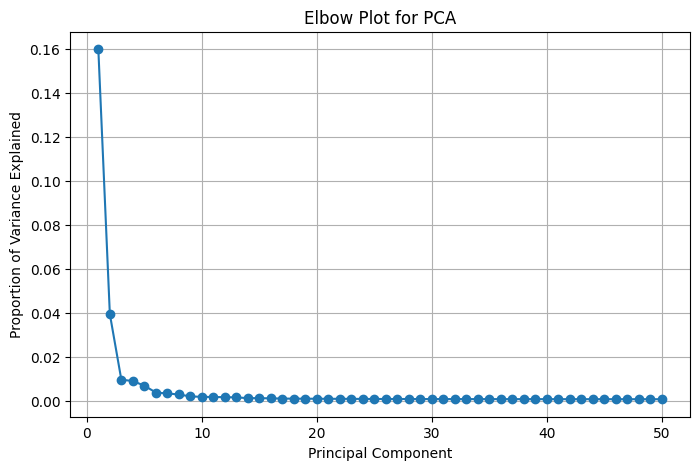

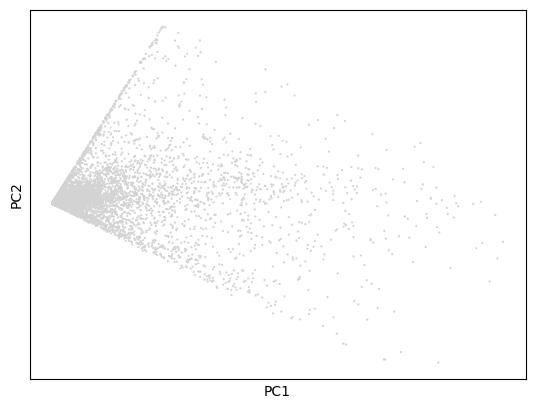

In [94]:
sc.tl.pca(data, svd_solver='arpack')

#elbow plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(data.uns['pca']['variance_ratio']) + 1), data.uns['pca']['variance_ratio'], marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.title('Elbow Plot for PCA')
plt.grid(True)
plt.show()

sc.pl.pca(data, size=10)  

C:\Users\Enzo\AppData\Local\Temp\ipykernel_13292\3674308277.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


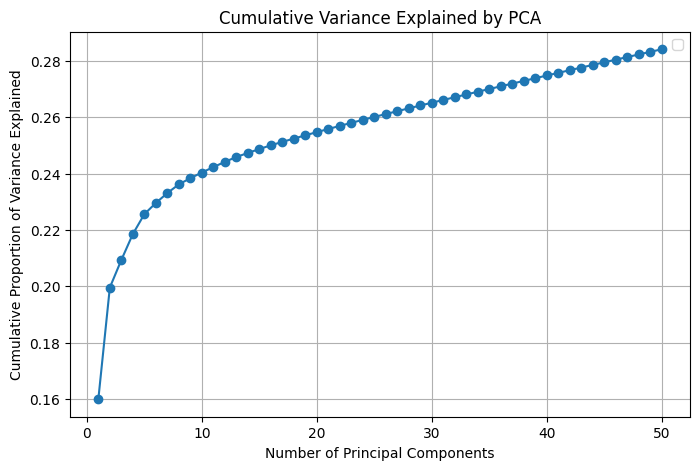

In [95]:
cumulative_variance = np.cumsum(data.uns['pca']['variance_ratio'])

# Plot the cumulative variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Proportion of Variance Explained')
plt.title('Cumulative Variance Explained by PCA')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
sc.pp.neighbors(data)
sc.tl.umap(data,min_dist=0.1)

sc.tl.leiden(data, flavor='igraph', n_iterations=2, directed=False)
        
sc.pl.umap(data, color='leiden', title='Leiden Clustering Results')